In [1]:
import os
import sys

In [2]:
##
os.chdir('../../..')

del(sys.path[0])
sys.path.insert(0, os.getcwd())
##

In [3]:
print(os.getcwd())
print(sys.path)

/home/artem/Desktop/programming/project_Yandex/project
['/home/artem/Desktop/programming/project_Yandex/project', '/home/artem/anaconda3/lib/python38.zip', '/home/artem/anaconda3/lib/python3.8', '/home/artem/anaconda3/lib/python3.8/lib-dynload', '', '/home/artem/anaconda3/lib/python3.8/site-packages', '/home/artem/anaconda3/lib/python3.8/site-packages/IPython/extensions', '/home/artem/.ipython']


### Main

In [21]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt 

In [6]:
df = pd.read_csv('model/Paragraphs/data_analysis/data/dates_clusterisation.csv')

In [15]:
df = df.drop(['Unnamed: 0'], axis=1)

In [16]:
df 

,file_name,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
0,data/Новая разметка/Непорожний П.С .Энергетик...,0.008416,0.008416,0.013772,0.483550,0.289212,0.0,0.013007,0.015302,0.0,...,0.015302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000765,0.000000
1,data/Новая разметка/Шеварднадзе Э._Когда рухну...,0.024615,0.124615,0.021538,0.098462,0.300000,0.0,0.103077,0.249231,0.0,...,0.003077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.030769
2,data/Новая разметка/Ельцин_Исповедь и _Президе...,0.036398,0.206897,0.118774,0.214559,0.273946,0.0,0.040230,0.063218,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.001916
3,data/Новая разметка/Ельцин_Исповедь и _Президе...,0.051471,0.330882,0.073529,0.117647,0.235294,0.0,0.029412,0.132353,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.007353
4,data/Новая разметка/Сахновская Наталья/Сахновс...,0.009302,0.260465,0.041860,0.562791,0.037209,0.0,0.018605,0.065116,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,data/Новая разметка/Гуськов /Гуськов.docx,0.030387,0.226519,0.055249,0.168508,0.287293,0.0,0.077348,0.069061,0.0,...,0.005525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.002762
148,data/Новая разметка/Кирпиченко В.А._Разведка_ ...,0.021429,0.078571,0.050000,0.050000,0.314286,0.0,0.157143,0.185714,0.0,...,0.078571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.014286
149,data/Новая разметка/Федосов Е.А._Полвека в ави...,0.171717,0.161616,0.010101,0.030303,0.474747,0.0,0.060606,0.040404,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
150,data/Новая разметка/Зыкова А. П/Зыкова А.П._До...,0.000000,0.000000,0.000000,0.000000,0.500000,0.0,0.250000,0.000000,0.0,...,0.125000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [19]:
link = linkage(df.drop(['file_name'], axis=1), 'ward', 'euclidean')

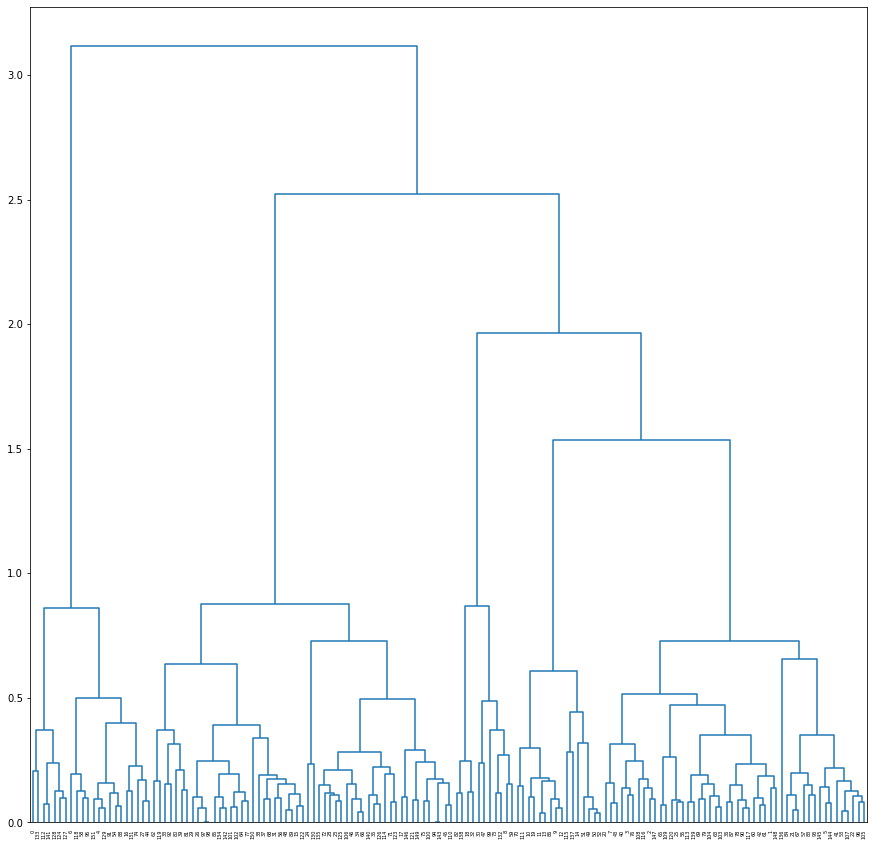

In [22]:
plt.figure(figsize=(15,15))
dn = dendrogram(link, color_threshold = -1)

In [26]:
dist = dist = link[:, 2]

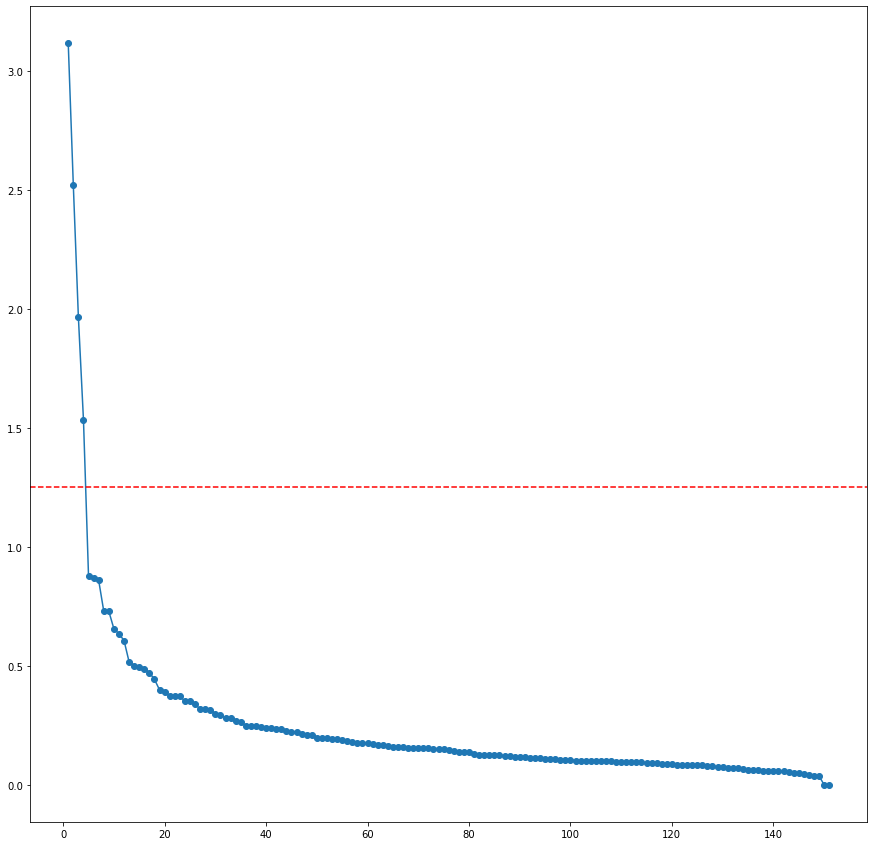

In [30]:
plt.figure(figsize=(15, 15))
plt.plot([i + 1 for i in range(len(dist))], dist[::-1], marker='o')
plt.axhline(y=1.25, c='red', linestyle='dashed')

In [63]:
df['cluster'] = fcluster(link, 1.25, criterion='distance')

In [64]:
mn = df.groupby('cluster').mean()
mn

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
cluster,,,,,,,,,,,,,,,,,,,,,
1,0.032836,0.219613,0.032567,0.510356,0.103380,0.000227,0.019197,0.028216,0.0,0.0,...,0.003595,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000087,0.002431
2,0.038648,0.089874,0.034644,0.045328,0.492733,0.000465,0.112099,0.094422,0.0,0.0,...,0.009576,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.003036
3,0.051270,0.598202,0.088957,0.085958,0.102202,0.012595,0.014230,0.019128,0.0,0.0,...,0.001297,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000767
4,0.027858,0.274712,0.048420,0.061770,0.163357,0.001323,0.042425,0.336929,0.0,0.0,...,0.006012,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.003829
5,0.053158,0.189121,0.061639,0.136931,0.314414,0.001107,0.092363,0.094223,0.0,0.0,...,0.006051,0.000071,0.0,0.0,0.0,0.0,0.0,0.0,0.000043,0.004683


In [69]:
mn['Type'] = ['Diary', 'Memoir', 'Memoir', 'Diary', 'Memoir']  

In [70]:
mn

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,Type
cluster,,,,,,,,,,,,,,,,,,,,,
1,0.032836,0.219613,0.032567,0.510356,0.103380,0.000227,0.019197,0.028216,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000087,0.002431,Diary
2,0.038648,0.089874,0.034644,0.045328,0.492733,0.000465,0.112099,0.094422,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.003036,Memoir
3,0.051270,0.598202,0.088957,0.085958,0.102202,0.012595,0.014230,0.019128,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000767,Memoir
4,0.027858,0.274712,0.048420,0.061770,0.163357,0.001323,0.042425,0.336929,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.003829,Diary
5,0.053158,0.189121,0.061639,0.136931,0.314414,0.001107,0.092363,0.094223,0.0,0.0,...,0.000071,0.0,0.0,0.0,0.0,0.0,0.0,0.000043,0.004683,Memoir


In [72]:
mn

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,Type
cluster,,,,,,,,,,,,,,,,,,,,,
1,0.032836,0.219613,0.032567,0.510356,0.103380,0.000227,0.019197,0.028216,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000087,0.002431,Diary
2,0.038648,0.089874,0.034644,0.045328,0.492733,0.000465,0.112099,0.094422,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.003036,Memoir
3,0.051270,0.598202,0.088957,0.085958,0.102202,0.012595,0.014230,0.019128,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000767,Memoir
4,0.027858,0.274712,0.048420,0.061770,0.163357,0.001323,0.042425,0.336929,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.003829,Diary
5,0.053158,0.189121,0.061639,0.136931,0.314414,0.001107,0.092363,0.094223,0.0,0.0,...,0.000071,0.0,0.0,0.0,0.0,0.0,0.0,0.000043,0.004683,Memoir


In [76]:
mn.to_csv("model/Paragraphs/data/clusters.csv")

In [35]:
for i in range(1, 6):
    print(len(df.groupby('cluster').groups[i]))

22
55
11
16
48


In [42]:
mn.loc[1].sort_values(ascending=False)

3     0.510356
1     0.219613
4     0.103380
0     0.032836
2     0.032567
        ...   
81    0.000000
82    0.000000
83    0.000000
84    0.000000
63    0.000000
Name: 1, Length: 128, dtype: float64

In [44]:
mn.loc[2].sort_values(ascending=False)

4      0.492733
6      0.112099
7      0.094422
1      0.089874
100    0.053540
         ...   
77     0.000000
78     0.000000
79     0.000000
80     0.000000
63     0.000000
Name: 2, Length: 128, dtype: float64

In [45]:
mn.loc[3].sort_values(ascending=False)

1     0.598202
4     0.102202
2     0.088957
3     0.085958
0     0.051270
        ...   
78    0.000000
79    0.000000
80    0.000000
81    0.000000
63    0.000000
Name: 3, Length: 128, dtype: float64

In [46]:
mn.loc[4].sort_values(ascending=False)

7     0.336929
1     0.274712
4     0.163357
3     0.061770
2     0.048420
        ...   
79    0.000000
80    0.000000
81    0.000000
83    0.000000
63    0.000000
Name: 4, Length: 128, dtype: float64

In [47]:
mn.loc[5].sort_values(ascending=False)

4     0.314414
1     0.189121
3     0.136931
7     0.094223
6     0.092363
        ...   
80    0.000000
81    0.000000
83    0.000000
84    0.000000
63    0.000000
Name: 5, Length: 128, dtype: float64

In [48]:
df.groupby('cluster').groups

{1: [0, 4, 6, 16, 27, 44, 54, 58, 74, 88, 91, 95, 112, 118, 124, 127, 128, 129, 131, 133, 141, 151], 2: [15, 17, 23, 24, 26, 28, 29, 31, 33, 34, 35, 37, 38, 39, 45, 46, 48, 56, 62, 64, 66, 68, 71, 72, 75, 77, 80, 81, 85, 89, 92, 94, 97, 98, 100, 101, 102, 106, 110, 114, 119, 121, 122, 123, 125, 126, 130, 134, 135, 140, 142, 143, 146, 149, 150], 3: [8, 18, 30, 32, 47, 59, 73, 82, 99, 132, 138], 4: [9, 10, 11, 12, 13, 14, 19, 49, 50, 51, 52, 70, 86, 111, 115, 137], 5: [1, 2, 3, 5, 7, 20, 21, 22, 25, 36, 40, 41, 42, 43, 53, 55, 57, 60, 61, 63, 65, 67, 69, 76, 78, 79, 83, 84, 87, 90, 93, 96, 103, 104, 105, 107, 108, 109, 113, 116, 117, 120, 136, 139, 144, 145, 147, 148]}

### Merge of clusters

In [58]:
groups_five = df.groupby('cluster').groups

In [59]:
df['cluster'] = fcluster(link, 4, criterion="maxclust")

In [60]:
groups_four = df.groupby('cluster').groups

In [62]:
for i in range(1, 6):
    for j in range(1, 5):
        if (groups_five[i][0] in groups_four[j]):
            print(i, '->', j)

1 -> 1
2 -> 2
3 -> 3
4 -> 4
5 -> 4


It ain't any good to merge clusters 